<a href="https://colab.research.google.com/github/BUGATAASHWINI/ML-Training-/blob/main/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "/content/heart.csv"
df = pd.read_csv(path)

In [3]:
print(df.head())
print(df.info())
print(df.isnull().sum())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [4]:
# Convert numeric target to descriptive labels
df['target'] = df['target'].map({0: 'No Disease', 1: 'Disease'})

In [5]:
X = df.drop(columns=['target'])
y = df['target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [8]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9707317073170731


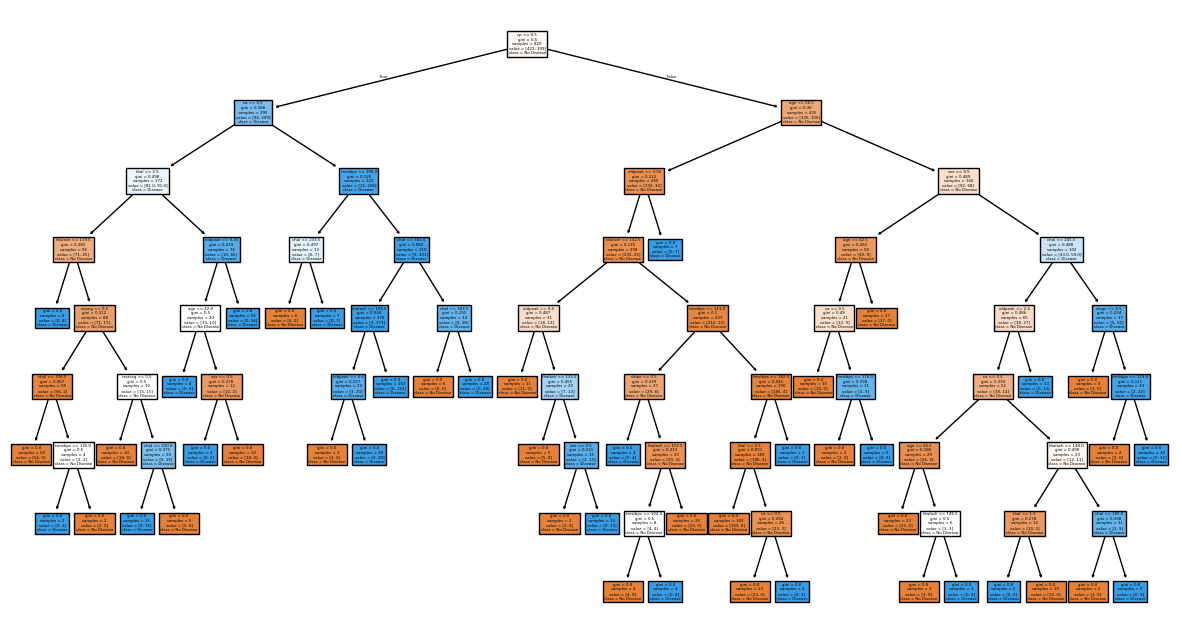

In [9]:
plt.figure(figsize=(15, 8))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.show()

In [10]:
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)
y_pred_pruned = dt_pruned.predict(X_test)
print("Pruned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))

Pruned Decision Tree Accuracy: 0.8634146341463415


In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9707317073170731


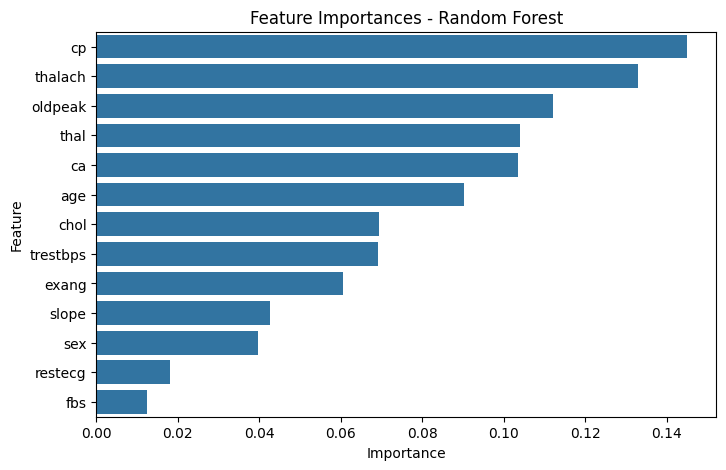

In [12]:
importances = rf.feature_importances_
feat_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df)
plt.title("Feature Importances - Random Forest")
plt.show()

In [13]:
cv_dt = cross_val_score(dt_pruned, X, y, cv=5).mean()
cv_rf = cross_val_score(rf, X, y, cv=5).mean()

print(f"Cross-validation Accuracy (Pruned Decision Tree): {cv_dt:.4f}")
print(f"Cross-validation Accuracy (Random Forest): {cv_rf:.4f}")

Cross-validation Accuracy (Pruned Decision Tree): 0.8341
Cross-validation Accuracy (Random Forest): 0.9971


In [14]:
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Classification Report (Random Forest):
              precision    recall  f1-score   support

     Disease       1.00      0.94      0.97       105
  No Disease       0.94      1.00      0.97       100

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205

